In [1]:
import pandas as pd

#reading in the data
project_df = pd.read_csv('C:\\Users\\adhit\\Downloads\\project-csv.csv')
project_df.shape

(35303, 19)

In [2]:
pwd

'C:\\Users\\adhit\\Desktop\\pers\\coding challenge\\git_code\\topic_modelling'

# Checking & removing the duplicates


In [9]:
#Removing duplicates

project_df['dup'] = project_df.duplicated(subset=None, keep='first')
project_df.head()

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,dup
0,101034345,DOROTHY,SIGNED,DevelOp interdisciplinaRy apprOaches to healTH...,2021-09-01T00:00:00Z,2026-08-31T00:00:00Z,5517000.0,2758500.00,H2020-EU.1.3.,MSCA-COFUND-2020,2021-04-27T00:00:00Z,H2020,H2020-MSCA-COFUND-2020,H2020-MSCA-COFUND-2020,MSCA-COFUND-FP,NaN,Responding to the need to equip European socie...,2021-09-02T20:45:37Z,235801,False
1,101034926,CNergy,SIGNED,Carbon Nanomembranes for Energy Storage Applic...,2021-05-01T00:00:00Z,2022-01-31T00:00:00Z,0.0,100000.00,NaN,FETOPEN-03-2018-2019-2020,NaN,H2020,NaN,H2020-FETOPEN-2018-2019-2020-4,CSA-LSP,NaN,CNM Technologies (CNMT) has developed a highly...,2021-05-21T11:29:04Z,235780,False
2,957151,SATELLITE IA,SIGNED,Advanced MMICs for SOTM and satellites constel...,2020-10-01T00:00:00Z,2021-12-31T00:00:00Z,0.0,109500.00,H2020-EU.2.3.,INNOSUP-02-2019-2020,2020-09-15T00:00:00Z,H2020,H2020-INNOSUP-2018-2020,H2020-INNOSUP-2020-02,CSA-LSP,NaN,The proliferation of LEO (Low Earth Orbit) and...,2021-10-05T18:36:06Z,231593,False
3,970958,TilePlus,SIGNED,Ground-breaking roof tile solution for solar e...,2021-06-01T00:00:00Z,2023-05-31T00:00:00Z,3472500.0,2430750.00,NaN,EIC-FTI-2018-2020,NaN,H2020,NaN,H2020-EIC-FTI-2018-2020,IA,NaN,The overall objective of the project is to mat...,2021-05-21T14:25:08Z,236314,False
4,970564,IMPOWER2X,SIGNED,INERATEC Modular Plants for Renewable Chemical...,2021-05-01T00:00:00Z,2023-04-30T00:00:00Z,3492082.5,2444457.75,NaN,EIC-SMEInst-2018-2020,NaN,H2020,NaN,H2020-EIC-SMEInst-2018-2020-3,SME-2b,NaN,INERATEC (IC) sells modular chemical plants fo...,2021-05-21T14:24:55Z,236312,False


In [10]:
# removing the duplicate columns.

project_df = project_df[project_df['dup'] == False]

In [11]:
project_df.shape

(35303, 20)

In [12]:
#deleting the column 'dup'
del project_df['dup']


# Text Preprocessing

In [13]:
import re
import spacy
from spacy.lang.en import English
from nltk.stem.snowball import SnowballStemmer
nlp = English()
nlp2= spacy.load('en_core_web_sm')
tokenizer = nlp.tokenizer
s_stemmer=SnowballStemmer(language='english')

def preprocess(input_text):
    
    # regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", input_text)
    
    # convert to lower case
    text_to_lower_case= letters_only_text.lower()
    
    
    # word tokenization
    token_list = []
    tokens = tokenizer(text_to_lower_case)
    for token in tokens:
        token_list.append(token.text)
    
    
    #stop words removal
    stop_words_removed_text=[]
    for tok in token_list:
        if nlp.vocab[tok].is_stop == False and len(tok.strip())!=0 and len(tok)!=1:
            stop_words_removed_text.append(tok)
#     print(stop_words_removed_text)


#      stemming
#     stemmed_text=[]
#     for word in stop_words_removed_text:
#         stemmed_text.append(s_stemmer.stem(word))
#      print(stemmed_text)
    
    
    #Lemmatization
    lemmatized_text=[]
    string=''
    for w in stop_words_removed_text:
        if string=='':
            string = w
        else:
            string= string + ' ' + w 
#     print(string)
    nlp_string = nlp2(string)
    for word in nlp_string:
        lemmatized_text.append(word.lemma_)
#     print(lemmatized_text)
    

    # converting list back to string
    return " ".join(lemmatized_text)

In [14]:
project_df['Cleaned_objective'] = project_df['objective'].apply(preprocess)

In [15]:
project_df[['id','objective','Cleaned_objective']]

,id,objective,Cleaned_objective
0,101034345,Responding to the need to equip European socie...,respond need equip european society multi disc...
1,101034926,CNM Technologies (CNMT) has developed a highly...,cnm technologies cnmt develop highly permeable...
2,957151,The proliferation of LEO (Low Earth Orbit) and...,proliferation leo low earth orbit meo medium e...
3,970958,The overall objective of the project is to mat...,overall objective project mature qualify enabl...
4,970564,INERATEC (IC) sells modular chemical plants fo...,ineratec ic sell modular chemical plant produc...
...,...,...,...
35298,694816,"Regione Liguria, together with IRE (its depend...",regione liguria ire dependent agency energy in...
35299,952008,The overall aim of the ExCEED project is to re...,overall aim exceed project recruit outstanding...
35300,952390,"TRANSCEND, designed as a translational researc...",transcend design translational research centre...
35301,699641,The proposal aims to promote the interest and ...,proposal aim promote interest investment small...


# Finding the commonly used words in each project

In [16]:
project_df['common_words']=''

In [17]:
from collections import Counter
for i in range(len(project_df["Cleaned_objective"])):
    common_w=[]
    tokens=project_df["Cleaned_objective"][i].split()
    comm=Counter(" ".join(tokens).split()).most_common(10)
#     print(comm)
    for j in comm:
        common_w.append(j[0])
#     print(common_w)
    project_df['common_words'][i]=common_w
    

C:\Users\adhit\AppData\Local\Temp/ipykernel_2748/3561361257.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_df['common_words'][i]=common_w


In [18]:
project_df.head()

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,...,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,Cleaned_objective,common_words
0,101034345,DOROTHY,SIGNED,DevelOp interdisciplinaRy apprOaches to healTH...,2021-09-01T00:00:00Z,2026-08-31T00:00:00Z,5517000.0,2758500.00,H2020-EU.1.3.,MSCA-COFUND-2020,...,H2020,H2020-MSCA-COFUND-2020,H2020-MSCA-COFUND-2020,MSCA-COFUND-FP,NaN,Responding to the need to equip European socie...,2021-09-02T20:45:37Z,235801,respond need equip european society multi disc...,"[health, public, research, tackle, future, cri..."
1,101034926,CNergy,SIGNED,Carbon Nanomembranes for Energy Storage Applic...,2021-05-01T00:00:00Z,2022-01-31T00:00:00Z,0.0,100000.00,NaN,FETOPEN-03-2018-2019-2020,...,H2020,NaN,H2020-FETOPEN-2018-2019-2020-4,CSA-LSP,NaN,CNM Technologies (CNMT) has developed a highly...,2021-05-21T11:29:04Z,235780,cnm technologies cnmt develop highly permeable...,"[membrane, cnm, thin, introduce, cnmt, selecti..."
2,957151,SATELLITE IA,SIGNED,Advanced MMICs for SOTM and satellites constel...,2020-10-01T00:00:00Z,2021-12-31T00:00:00Z,0.0,109500.00,H2020-EU.2.3.,INNOSUP-02-2019-2020,...,H2020,H2020-INNOSUP-2018-2020,H2020-INNOSUP-2020-02,CSA-LSP,NaN,The proliferation of LEO (Low Earth Orbit) and...,2021-10-05T18:36:06Z,231593,proliferation leo low earth orbit meo medium e...,"[orbit, satellite, earth, requirement, need, a..."
3,970958,TilePlus,SIGNED,Ground-breaking roof tile solution for solar e...,2021-06-01T00:00:00Z,2023-05-31T00:00:00Z,3472500.0,2430750.00,NaN,EIC-FTI-2018-2020,...,H2020,NaN,H2020-EIC-FTI-2018-2020,IA,NaN,The overall objective of the project is to mat...,2021-05-21T14:25:08Z,236314,overall objective project mature qualify enabl...,"[solar, roof, tile, high, project, market, pan..."
4,970564,IMPOWER2X,SIGNED,INERATEC Modular Plants for Renewable Chemical...,2021-05-01T00:00:00Z,2023-04-30T00:00:00Z,3492082.5,2444457.75,NaN,EIC-SMEInst-2018-2020,...,H2020,NaN,H2020-EIC-SMEInst-2018-2020-3,SME-2b,NaN,INERATEC (IC) sells modular chemical plants fo...,2021-05-21T14:24:55Z,236312,ineratec ic sell modular chemical plant produc...,"[ic, customer, plant, renewable, co, fuel, rea..."


# Word cloud

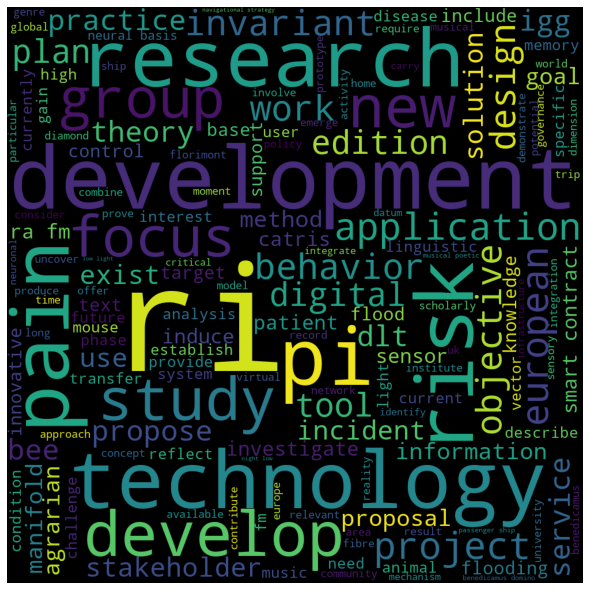

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import random

all_words = ''


for k in range(10):
    random_int= random.randint(0,35303)
    tokens2= project_df['Cleaned_objective'][random_int].split()
    all_words += " ".join(tokens2)+ " "
#     print(all_words)
    
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='black', 
                min_font_size = 10).generate(all_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Topic Modelling

In [158]:
project_df.isnull().sum()

id                        0
acronym                   0
status                    0
title                     0
startDate                10
endDate                  24
totalCost                 0
ecMaxContribution         0
legalBasis            27957
topics                    0
ecSignatureDate       27957
frameworkProgramme        0
masterCall            27957
subCall                   0
fundingScheme             0
nature                   30
objective                 0
contentUpdateDate         0
rcn                       0
Cleaned_objective         0
dtype: int64

In [163]:
project_df['Cleaned_objective'][0]

'respond need equip european society multi disciplinary expertise tackle future public health crisis dorothy cofund recruit train launch career excellent fellow month fellowship month overseas months ireland postdoctoral researcher discipline eligible epidemiology engineering material diagnostic tool psychology economic social history education sociology political science medical health humanity philosophy long research project fall remit public health crise dorothy goal support fellow career development excellent training supervision mentor prepare future career opportunity mean exceptional skill timely topical experience gain fellowship create critical mass networked expert disciplinary area fully able engage irish eu innovation ecosystem set innovative multidisciplinary research training platform individual train tackle future public health crisis way lead positive societal impact promote dissemination communication impactful research traditional academic channel target policymaker 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.9,min_df=10,stop_words='english',token_pattern='[a-zA-Z0-9]{3,}')
dtm= cv.fit_transform(project_df['Cleaned_objective'])

In [24]:
dtm

<35303x41324 sparse matrix of type '<class 'numpy.int64'>'
	with 3905122 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.decomposition import LatentDirichletAllocation
LDA= LatentDirichletAllocation(n_components=8,random_state=50)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=8, random_state=50)

# Grab topics

In [38]:
LDA.components_.shape

(8, 41324)

In [39]:
samp=LDA.components_[0]
samp.argsort()[-10:]

array([ 9427, 29673, 35016, 13490, 35398, 29761, 16433, 21995, 30356,
       25101], dtype=int64)

In [40]:
for i, topic in enumerate(LDA.components_):
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    

['light', 'control', 'application', 'model', 'study', 'develop', 'project', 'state', 'field', 'structure', 'property', 'high', 'material', 'quantum', 'new']
['understand', 'knowledge', 'practice', 'europe', 'approach', 'aim', 'public', 'science', 'new', 'european', 'study', 'policy', 'social', 'project', 'research']
['time', 'specie', 'field', 'group', 'provide', 'evolution', 'understand', 'datum', 'analysis', 'theory', 'model', 'new', 'study', 'research', 'project']
['need', 'low', 'company', 'time', 'reduce', 'energy', 'year', 'develop', 'product', 'project', 'high', 'solution', 'technology', 'cost', 'market']
['user', 'platform', 'base', 'sme', 'technology', 'management', 'provide', 'develop', 'european', 'network', 'support', 'innovation', 'service', 'project', 'datum']
['gene', 'target', 'novel', 'brain', 'model', 'protein', 'mechanism', 'human', 'treatment', 'study', 'clinical', 'cancer', 'patient', 'disease', 'cell']
['application', 'industrial', 'industry', 'design', 'high', 'b

In [186]:
topic_results=LDA.transform(dtm)

In [187]:
topic_results.shape

(35303, 5)

In [190]:
topic_results[0].argmax()

2

# Visualization of topic wise distribution of words

In [32]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook

<function pyLDAvis._display.enable_notebook(local=False, **kwargs)>

In [41]:
vis = pyLDAvis.sklearn.prepare(lda_model=LDA,dtm=dtm,vectorizer=cv)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [44]:
from pprint import pprint
# Log Likelyhood: Higher the better
print("Log Likelihood: ", LDA.score(dtm))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", LDA.perplexity(dtm))

# See model parameters
print(LDA.get_params())

Log Likelihood:  -42345082.53692094
Perplexity:  2385.3753270772067


TypeError: 'module' object is not callable

In [48]:
print(LDA)

LatentDirichletAllocation(n_components=8, random_state=50)


# Selecting the right number of topics

In [50]:
from sklearn.model_selection import GridSearchCV


# Define Search Param
search_params = {'n_components': [8, 10, 12, 15], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(dtm)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [8, 10, 12, 15]})

In [51]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(dtm))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 8}
Best Log Likelihood Score:  -8816692.860934492
Model Perplexity:  2338.2169328964774
